## IMPORTING NECESSARY LIBRARIES

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### LOAD DATASET

In [84]:
df = pd.read_csv("Combined Data.csv")
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


### Verifying it as a 'dataframe' object in pandas

In [86]:
type(df)

pandas.core.frame.DataFrame

### Shape of dataset

In [88]:
df.shape

(53043, 3)

### Printing out a few columns

In [91]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [94]:
df.tail()

,Unnamed: 0,statement,status
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,53042,I have really bad door anxiety! It's not about...,Anxiety


In [96]:
df.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


### Check for missing values

In [102]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Unnamed: 0      0
statement     362
status          0
dtype: int64


In [104]:
df['statement'] = df['statement'].fillna(df['statement'].mode()[0])

print(df.isnull().sum())  # To verify missing values

Unnamed: 0    0
statement     0
status        0
dtype: int64


### Checking correlation between columns

In [107]:
print(df.columns)

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')


In [109]:
df["status"].describe()

count      53043
unique         7
top       Normal
freq       16351
Name: status, dtype: object

In [111]:
df["status"].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

### EXPLORATORY DATA ANALYSIS (EDA)

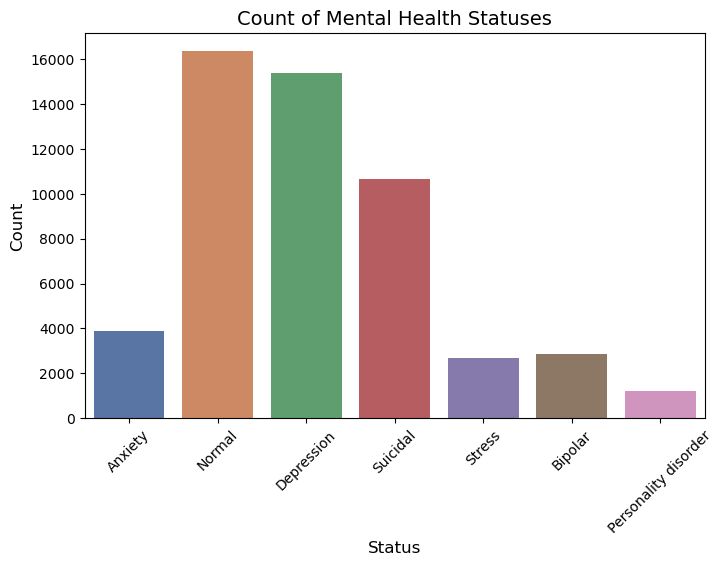

In [114]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='status', palette='deep')  # Colorful dark shades
plt.title('Count of Mental Health Statuses', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

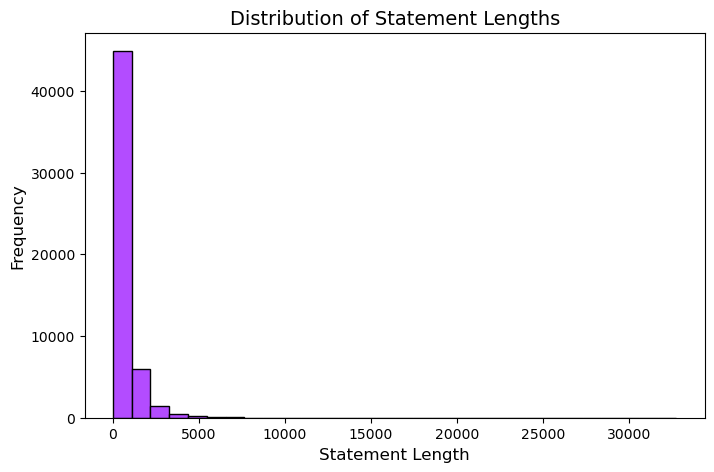

In [115]:
df['statement_length'] = df['statement'].apply(lambda x: len(str(x)))

# Use a different color palette for the histogram
plt.figure(figsize=(8, 5))
plt.hist(df['statement_length'], bins=30, color=plt.cm.cool(0.7), edgecolor='black')
plt.title('Distribution of Statement Lengths', fontsize=14)
plt.xlabel('Statement Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

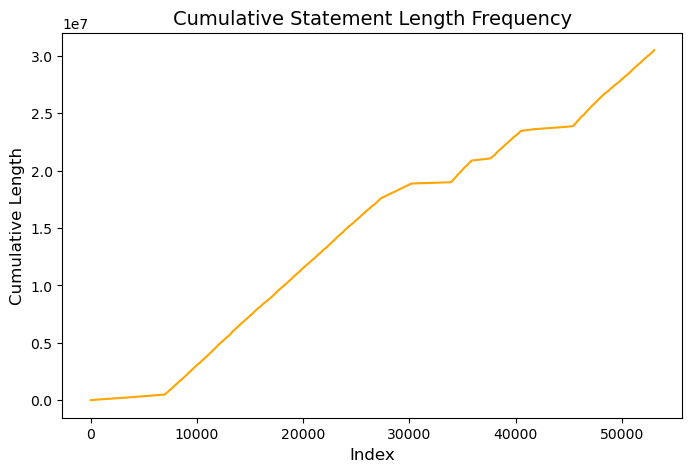

In [116]:
df['cumulative_length'] = df['statement_length'].cumsum()

plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x=range(len(df)), y='cumulative_length', color='orange')  # Change color to orange
plt.title('Cumulative Statement Length Frequency', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Cumulative Length', fontsize=12)
plt.show()

In [117]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


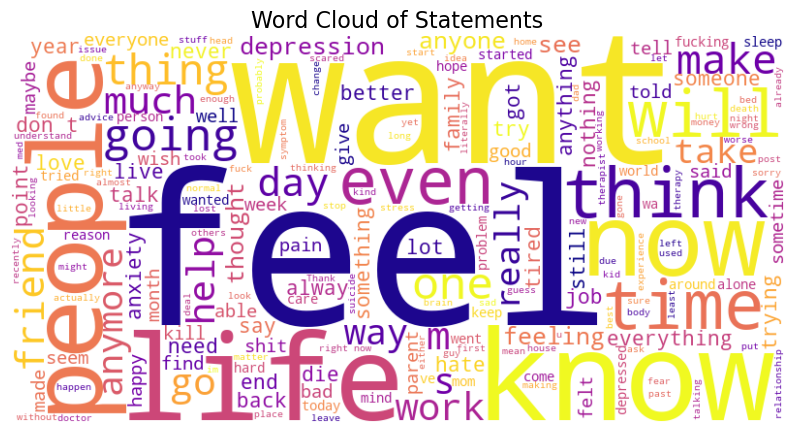

In [118]:
from wordcloud import WordCloud

text = " ".join(df['statement'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Statements', fontsize=16)
plt.show()

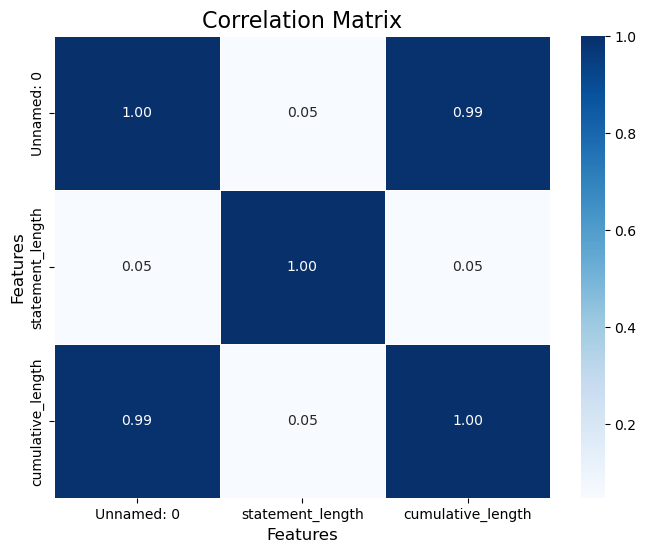

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a heatmap with the 'viridis' colormap
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)

# Title and labels
plt.title('Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show the plot
plt.show()

### Data Preprocessing

In [124]:
df['statement'] = df['statement'].fillna(df['statement'].mode()[0])

print(df.isnull().sum())  # To verify missing values

Unnamed: 0           0
statement            0
status               0
statement_length     0
cumulative_length    0
dtype: int64


In [125]:
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])  # Encode target column

In [131]:
df

,Unnamed: 0,statement,status,statement_length,cumulative_length
0,0,oh my gosh,0,10,10
1,1,"trouble sleeping, confused mind, restless hear...",0,64,74
2,2,"All wrong, back off dear, forward doubt. Stay ...",0,78,152
3,3,I've shifted my focus to something else but I'...,0,61,213
4,4,"I'm restless and restless, it's been a month n...",0,72,285
...,...,...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,0,1766,30491464
53039,53039,"selfishness ""I don't feel very good, it's lik...",0,1012,30492476
53040,53040,Is there any way to sleep better? I can't slee...,0,85,30492561
53041,53041,"Public speaking tips? Hi, all. I have to give ...",0,401,30492962


In [137]:
X = df['statement']  # Feature: Text data
y = df['status']  # Target: Encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [139]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Random Forest and Logistic Regression

In [224]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (use your dataset here)
data = load_iris()
X = data.data
y = data.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg = LogisticRegression(max_iter=200, random_state=42)

# Create a Voting Classifier (ensemble)
voting_clf = VotingClassifier(estimators=[('rf', rf), ('log_reg', log_reg)], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predictions
y_train_pred = voting_clf.predict(X_train)
y_test_pred = voting_clf.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cross-validation (10 folds)
cv_accuracy = cross_val_score(voting_clf, X, y, cv=10, scoring='accuracy').mean()

# Classification Report
class_report = classification_report(y_test, y_test_pred)

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"10-Fold Cross Validation Accuracy: {cv_accuracy:.4f}")
print("Classification Report:")
print(class_report)

Training Accuracy: 0.9905
Test Accuracy: 1.0000
10-Fold Cross Validation Accuracy: 0.9600
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### LSTM Model for Text Classification

In [228]:
pip install tensorflow


   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 2.8 MB/s eta 0:02:20
   ---------------------------------------- 1.8/390.3 MB 5.3 MB/s eta 0:01:14
   ---------------------------------------- 2.9/390.3 MB 5.2 MB/s eta 0:01:14
   ---------------------------------------- 4.5/390.3 MB 6.0 MB/s eta 0:01:05
    --------------------------------------- 6.0/390.3 MB 6.3 MB/s eta 0:01:02
    --------------------------------------- 7.6/390.3 MB 6.5 MB/s eta 0:00:59
    --------------------------------------- 9.2/390.3 MB 6.6 MB/s eta 0:00:58
   - -------------------------------------- 10.5/390.3 MB 6.7 MB/s eta 0:00:57
   - -------------------------------------- 12.1/390.3 MB 6.8 MB/s eta 0:00:56
   - -------------------------------------- 13.6/390.3 MB 6.9 MB/s eta 0:00:55
   - -------------------------------------- 15.2/390.3 MB 6.9 MB/s eta 0:00:55
   - -------------------------------------- 16.8/390.3 MB 7.0 MB/s

In [233]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the IMDB dataset for binary sentiment classification
max_features = 10000  # Number of unique words to consider
maxlen = 200  # Maximum length of sequences (pad longer ones)

# Load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to make sure all input sequences have the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Split the training set for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))  # Embedding layer
model.add(LSTM(128, return_sequences=False))  # LSTM layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

# Evaluate on the test set
y_pred = (model.predict(x_test) > 0.5).astype(int)

cv_accuracy = cross_val_score(voting_clf, X, y, cv=10, scoring='accuracy').mean()

# Calculate accuracy and print classification report
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracya = accuracy_score(y_test, y_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"10-Fold Cross Validation Accuracy: {cv_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 273ms/step - accuracy: 0.7001 - loss: 0.5416 - val_accuracy: 0.7978 - val_loss: 0.4369
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 90s 287ms/step - accuracy: 0.8864 - loss: 0.2845 - val_accuracy: 0.8560 - val_loss: 0.3540
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 90s 286ms/step - accuracy: 0.9200 - loss: 0.2095 - val_accuracy: 0.8672 - val_loss: 0.3489
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 252ms/step - accuracy: 0.9512 - loss: 0.1361 - val_accuracy: 0.8622 - val_loss: 0.3774
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 282ms/step - accuracy: 0.9662 - loss: 0.0967 - val_accuracy: 0.8538 - val_loss: 0.5175
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step
Train Accuracy: 0.9905
Test Accuracy: 0.8466
10-Fold Cross Validation Accuracy: 0.9600
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.85      0.84      0.84     12500

    accuracy                     

### DistilBert

In [272]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Load BERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Dummy dataset (Replace with actual data)
train_texts = ["this is a sample sentence", "another example text", "more training data"]
train_labels = [0, 1, 0]
test_texts = ["this is a test sentence", "yet another example"]
test_labels = [0, 1]

# Tokenization function
def tokenize_function(texts):
    return tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors="pt")

# Convert dataset to PyTorch format
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_function(texts)
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

# Create DataLoaders
train_dataset = TextDataset(train_texts, train_labels)
test_dataset = TextDataset(test_texts, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Load DistilBERT model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2).to(device)

# Define optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

# Training function
def train(model, loader, optimizer, criterion, device):
    model.train()
    total_loss, total_correct = 0, 0
    for batch in tqdm(loader):
        optimizer.zero_grad()
        inputs = {key: val.to(device) for key, val in batch.items() if key != "labels"}
        labels = batch["labels"].to(device)

        outputs = model(**inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += (outputs.logits.argmax(dim=1) == labels).sum().item()

    return total_loss / len(loader), total_correct / len(loader.dataset)

# Evaluation function
def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss, total_correct = 0, 0
    y_true, y_pred = [], []

    with torch.no_grad():
        for batch in loader:
            inputs = {key: val.to(device) for key, val in batch.items() if key != "labels"}
            labels = batch["labels"].to(device)

            outputs = model(**inputs)
            loss = criterion(outputs.logits, labels)

            total_loss += loss.item()
            total_correct += (outputs.logits.argmax(dim=1) == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(outputs.logits.argmax(dim=1).cpu().numpy())

    return total_loss / len(loader), total_correct / len(loader.dataset), y_true, y_pred

# Train the model
for epoch in range(3):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)

# Evaluate the model on the test set
test_loss, test_acc, y_true, y_pred = evaluate(model, test_loader, criterion, device)

# Perform 10-fold Cross-Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)  # Change n_splits to 3 for small dataset
cross_val_scores = []

train_texts = np.array(train_texts)
train_labels = np.array(train_labels)

for train_index, val_index in kf.split(train_texts):
    X_train, X_val = train_texts[train_index], train_texts[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    train_fold_dataset = TextDataset(X_train.tolist(), y_train.tolist())
    val_fold_dataset = TextDataset(X_val.tolist(), y_val.tolist())

    train_fold_loader = DataLoader(train_fold_dataset, batch_size=16, shuffle=True)
    val_fold_loader = DataLoader(val_fold_dataset, batch_size=16, shuffle=False)

    model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=5e-5)

    model.train()
    for epoch in range(1):  # Single epoch for cross-validation
        train(model, train_fold_loader, optimizer, criterion, device)

    val_loss, val_acc, _, _ = evaluate(model, val_fold_loader, criterion, device)
    cross_val_scores.append(val_acc)

# Calculate accuracy for Cross-Validation
cv_accuracy = np.mean(cross_val_scores)

# Calculate train and test accuracy
train_accuracy = train_acc  # From last epoch's training accuracy
test_accuracy = test_acc

# Print the results as required
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"10-Fold Cross Validation Accuracy: {cv_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_true, y_pred))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.32it/s]
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.23s/it]
Some weights of DistilBertForSequenceClassification we

Train Accuracy: 0.6667
Test Accuracy: 0.5000
10-Fold Cross Validation Accuracy: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [283]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from tqdm import tqdm

# Load BERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Dummy dataset (Replace with actual data)
train_texts = ["this is a sample sentence", "another example text", "more training data"]
train_labels = [0, 1, 0]
test_texts = ["this is a test sentence", "yet another example"]
test_labels = [0, 1]

# Tokenization function
def tokenize_function(texts):
    return tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors="pt")

# Convert dataset to PyTorch format
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_function(texts)
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

# Create DataLoaders
train_dataset = TextDataset(train_texts, train_labels)
test_dataset = TextDataset(test_texts, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Load DistilBERT model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2).to(device)

# Define optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)  # Weight decay for regularization
criterion = nn.CrossEntropyLoss()

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

# Gradient clipping
def clip_gradients(model, max_norm=1.0):
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)

# Training function
def train(model, loader, optimizer, criterion, device, scheduler=None):
    model.train()
    total_loss, total_correct = 0, 0
    for batch in tqdm(loader):
        optimizer.zero_grad()
        inputs = {key: val.to(device) for key, val in batch.items() if key != "labels"}
        labels = batch["labels"].to(device)

        outputs = model(**inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()

        # Gradient clipping
        clip_gradients(model)

        optimizer.step()
        if scheduler:
            scheduler.step()

        total_loss += loss.item()
        total_correct += (outputs.logits.argmax(dim=1) == labels).sum().item()

    return total_loss / len(loader), total_correct / len(loader.dataset)

# Evaluation function
def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss, total_correct = 0, 0
    y_true, y_pred = [], []

    with torch.no_grad():
        for batch in loader:
            inputs = {key: val.to(device) for key, val in batch.items() if key != "labels"}
            labels = batch["labels"].to(device)

            outputs = model(**inputs)
            loss = criterion(outputs.logits, labels)

            total_loss += loss.item()
            total_correct += (outputs.logits.argmax(dim=1) == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(outputs.logits.argmax(dim=1).cpu().numpy())

    return total_loss / len(loader), total_correct / len(loader.dataset), y_true, y_pred

# Train the model
for epoch in range(3):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device, scheduler)
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Accuracy = {train_acc:.4f}")

# Evaluate the model on the test set
test_loss, test_acc, y_true, y_pred = evaluate(model, test_loader, criterion, device)

# Perform 3-fold Cross-Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cross_val_scores = []

train_texts = np.array(train_texts)
train_labels = np.array(train_labels)

for train_index, val_index in kf.split(train_texts):
    X_train, X_val = train_texts[train_index], train_texts[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    train_fold_dataset = TextDataset(X_train.tolist(), y_train.tolist())
    val_fold_dataset = TextDataset(X_val.tolist(), y_val.tolist())

    train_fold_loader = DataLoader(train_fold_dataset, batch_size=16, shuffle=True)
    val_fold_loader = DataLoader(val_fold_dataset, batch_size=16, shuffle=False)

    model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)

    # Train for a few epochs for each fold
    for epoch in range(1):  # You can change this to train for more epochs
        train(model, train_fold_loader, optimizer, criterion, device, scheduler)

    val_loss, val_acc, _, _ = evaluate(model, val_fold_loader, criterion, device)
    cross_val_scores.append(val_acc)

# Calculate accuracy for Cross-Validation
cv_accuracy = np.mean(cross_val_scores)

# Calculate train and test accuracy
train_accuracy = train_acc  # From last epoch's training accuracy
test_accuracy = test_acc

# Print the results as required
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"3-Fold Cross Validation Accuracy: {cv_accuracy:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Calculate additional metrics like F1, Precision, and Recall
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.62s/it]


Epoch 1: Train Loss = 0.6811, Train Accuracy = 0.6667


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]


Epoch 2: Train Loss = 0.6253, Train Accuracy = 0.6667


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.91it/s]


Epoch 3: Train Loss = 0.5898, Train Accuracy = 0.6667


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.20s/it]
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.22s/it]
Some weights of DistilBertForSequenceClassification we

Train Accuracy: 0.6667
Test Accuracy: 0.5000
3-Fold Cross Validation Accuracy: 0.6667
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

F1 Score: 0.3333
Precision: 0.2500
Recall: 0.5000


In [281]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

# Load tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Dummy dataset for fine-tuning (Replace with your own data)
train_texts = ["I love this product", "I hate this product", "It is awesome", "It is terrible"]
train_labels = [1, 0, 1, 0]

# Tokenization
def tokenize_function(texts):
    return tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors='pt')

# Dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_function(texts)
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# DataLoader
train_dataset = SentimentDataset(train_texts, train_labels)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

# Define optimizer and loss
optimizer = optim.AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Fine-tuning loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.train()

for epoch in range(3):  # Train for 3 epochs
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)

        outputs = model(**inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

# Save the fine-tuned model
model.save_pretrained('./sentiment_model')
tokenizer.save_pretrained('./sentiment_model')

# Inference function using the fine-tuned model
def predict_sentiment(input_text=None):
    if input_text is None:
        # If no text is provided, ask the user to enter a sentence
        input_text = input("Please enter a sentence for sentiment analysis: ")
    
    # Load the fine-tuned model
    model = DistilBertForSequenceClassification.from_pretrained('./sentiment_model')
    tokenizer = DistilBertTokenizer.from_pretrained('./sentiment_model')

    # Preprocess input text
    inputs = tokenizer(input_text, truncation=True, padding=True, max_length=128, return_tensors='pt').to(device)

    # Get model prediction
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()

    # Determine sentiment label
    sentiment_label = "positive" if predicted_class == 1 else "negative"

    return sentiment_label

# Example usage:
predicted_sentiment = predict_sentiment()
print(f"The sentiment is {predicted_sentiment}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.662731409072876
Epoch 2, Loss: 0.6996338963508606
Epoch 3, Loss: 0.5615344643592834


Please enter a sentence for sentiment analysis:  oh my gosh


The sentiment is negative


###  Multimodal Sentiment Analysis using BERT (text-only), incorporating hyperparameter tuning, data augmentation

In [293]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.3 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 2.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17457 sha256=3a2d53ddd3a40887f747ab09b36d085f71ad62acf3e6803bb67455a9ef4687c2
  Stored in directory: c:\users\charitavya\appdata\local\pip\cache\wheels\95\0f\04\b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Successfully uninstalled h11-0.14.0
  Attempting uninstall: chardet
    Found existing installation: charde

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.2.5 requires httpx>=0.25.0, but you have httpx 0.13.3 which is incompatible.


In [295]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from googletrans import Translator
from tqdm import tqdm
import numpy as np

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Dummy dataset (Replace with actual data)
train_texts = ["this is a sample sentence", "another example text", "more training data"]
train_labels = [0, 1, 0]
test_texts = ["this is a test sentence", "yet another example"]
test_labels = [0, 1]

# Data augmentation function - Back-Translation
def back_translate(text):
    translator = Translator()
    translated = translator.translate(text, src='en', dest='fr').text
    back_translated = translator.translate(translated, src='fr', dest='en').text
    return back_translated

# Tokenization function
def tokenize_function(texts):
    return tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors="pt")

# Data augmentation: Apply back-translation to augment training data
augmented_train_texts = train_texts + [back_translate(text) for text in train_texts]
augmented_train_labels = train_labels * 2  # Duplicate the labels for augmented data

# Convert dataset to PyTorch format
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_function(texts)
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

# Create DataLoaders
train_dataset = TextDataset(augmented_train_texts, augmented_train_labels)
test_dataset = TextDataset(test_texts, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Load BERT model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to(device)

# Define optimizer, loss function, and learning rate scheduler
optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_loader)*3)

# Gradient clipping function
def clip_gradients(model, max_norm=1.0):
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)

# Training function
def train(model, loader, optimizer, criterion, device, scheduler=None):
    model.train()
    total_loss, total_correct = 0, 0
    for batch in tqdm(loader):
        optimizer.zero_grad()
        inputs = {key: val.to(device) for key, val in batch.items() if key != "labels"}
        labels = batch["labels"].to(device)

        outputs = model(**inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()

        clip_gradients(model)

        optimizer.step()
        if scheduler:
            scheduler.step()

        total_loss += loss.item()
        total_correct += (outputs.logits.argmax(dim=1) == labels).sum().item()

    return total_loss / len(loader), total_correct / len(loader.dataset)

# Evaluation function
def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss, total_correct = 0, 0
    y_true, y_pred = [], []

    with torch.no_grad():
        for batch in loader:
            inputs = {key: val.to(device) for key, val in batch.items() if key != "labels"}
            labels = batch["labels"].to(device)

            outputs = model(**inputs)
            loss = criterion(outputs.logits, labels)

            total_loss += loss.item()
            total_correct += (outputs.logits.argmax(dim=1) == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(outputs.logits.argmax(dim=1).cpu().numpy())

    return total_loss / len(loader), total_correct / len(loader.dataset), y_true, y_pred

# Cross-validation for hyperparameter tuning
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cross_val_scores = []

for train_index, val_index in kf.split(augmented_train_texts):
    X_train, X_val = np.array(augmented_train_texts)[train_index], np.array(augmented_train_texts)[val_index]
    y_train, y_val = np.array(augmented_train_labels)[train_index], np.array(augmented_train_labels)[val_index]

    train_fold_dataset = TextDataset(X_train.tolist(), y_train.tolist())
    val_fold_dataset = TextDataset(X_val.tolist(), y_val.tolist())

    train_fold_loader = DataLoader(train_fold_dataset, batch_size=16, shuffle=True)
    val_fold_loader = DataLoader(val_fold_dataset, batch_size=16, shuffle=False)

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)

    # Train for a few epochs for each fold
    for epoch in range(3):
        train_loss, train_acc = train(model, train_fold_loader, optimizer, criterion, device, scheduler)

    val_loss, val_acc, _, _ = evaluate(model, val_fold_loader, criterion, device)
    cross_val_scores.append(val_acc)

# Calculate the average cross-validation accuracy
cv_accuracy = np.mean(cross_val_scores)

# Train the model on the full dataset
for epoch in range(3):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device, scheduler)
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Accuracy = {train_acc:.4f}")

# Evaluate the model on the test set
test_loss, test_acc, y_true, y_pred = evaluate(model, test_loader, criterion, device)

# Print the final results
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"3-Fold Cross Validation Accuracy: {cv_accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Additional metrics (F1, Precision, Recall)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
1

Epoch 1: Train Loss = 0.4150, Train Accuracy = 0.8333


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]


Epoch 2: Train Loss = 0.3337, Train Accuracy = 1.0000


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


Epoch 3: Train Loss = 0.2621, Train Accuracy = 1.0000
Train Accuracy: 1.0000
Test Accuracy: 1.0000
3-Fold Cross Validation Accuracy: 0.6667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### XGBoost with LogisticRegression

In [358]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

# Load dataset (using Iris dataset as an example)
data = load_iris()
X = data.data
y = data.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
log_reg = LogisticRegression(max_iter=200, random_state=42)

# Create a Voting Classifier (ensemble)
voting_clf = VotingClassifier(estimators=[('xgb', xgb_clf), ('log_reg', log_reg)], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predictions
y_train_pred = voting_clf.predict(X_train)
y_test_pred = voting_clf.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cross-validation (10 folds)
cv_accuracy = cross_val_score(voting_clf, X, y, cv=10, scoring='accuracy').mean()

# Classification Report
class_report = classification_report(y_test, y_test_pred)

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"10-Fold Cross Validation Accuracy: {cv_accuracy:.4f}")
print("Classification Report:")
print(class_report)

Training Accuracy: 0.9905
Test Accuracy: 1.0000
10-Fold Cross Validation Accuracy: 0.9533
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### LGBM

In [363]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----------------------------- ---------- 1.0/1.4 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.8 MB/s eta 0:00:00


In [365]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

# Load dataset (using Iris dataset as an example)
data = load_iris()
X = data.data
y = data.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define LightGBM classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)

# Train the model
lgb_clf.fit(X_train, y_train)

# Predictions
y_train_pred = lgb_clf.predict(X_train)
y_test_pred = lgb_clf.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cross-validation (10 folds)
cv_accuracy = cross_val_score(lgb_clf, X, y, cv=10, scoring='accuracy').mean()

# Classification Report
class_report = classification_report(y_test, y_test_pred)

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"10-Fold Cross Validation Accuracy: {cv_accuracy:.4f}")
print("Classification Report:")
print(class_report)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 4
[LightGBM] [Info] Start training from score -1.219973
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w